# Introduction to the workflow structure

This notebook gives a brief overview of the workflow structure and introduces some useful DataJoint tools to facilitate the exploration.

- DataJoint needs to be pre-configured before running this notebook, if you haven't set up the configuration, refer to notebook [01-configure](01-configure.ipynb).

- If you are familiar with DataJoint and the workflow structure, proceed to the next notebook [03-process](03-process.ipynb) directly to run the workflow.

- For a more thorough introduction of DataJoint functionality, please visit our [Elements user guide](https://datajoint.com/docs/elements/user-guide/) and [general documentation](https://datajoint.com/docs/core/concepts/mantra/)

To load the local configuration, we will change the directory to the package root.


In [1]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

## Schemas and tables

The current workflow is composed of multiple database schemas, each of them corresponds to a module within `workflow_optogenetics.pipeline`


In [2]:
import datajoint as dj
from workflow_optogenetics.pipeline import lab, subject, surgery, session, opto, Device

[2022-12-06 14:56:19,370][INFO]: Connecting cbroz@dss-db.datajoint.io:3306
[2022-12-06 14:56:19,698][INFO]: Connected cbroz@dss-db.datajoint.io:3306


Each module contains a schema object that enables interaction with the schema in the database.


In [3]:
opto.schema

Schema `cbroz_wfopto_opto`

The table classes in the module corresponds to a table in the schema in the database.


In [4]:
# preview columns and contents in a table
opto.OptoWaveform()

waveform_name,waveform_type,"normalized_waveform For one cycle, normalized to peak",waveform_description description of the waveform
square_10,square,=BLOB=,Square waveform: 10%/90% on/off cycle


By importing the modules for the first time, the schemas and tables will be created inside the database.

Once created, importing modules will not create schemas and tables again, but the existing schemas/tables can be accessed and manipulated by the modules.


## DataJoint tools to explore schemas and tables

`dj.list_schemas()`: list all schemas a user has access to in the current database


In [ ]:
dj.list_schemas()

`dj.Diagram()`: plot tables and dependencies in a schema. See also [diagram notation docs](https://datajoint.com/docs/core/concepts/getting-started/diagrams/).


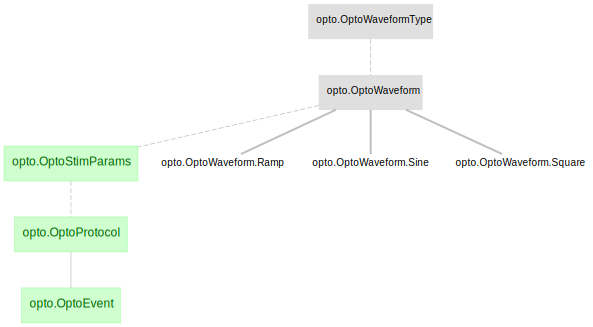

In [5]:
# Plot diagram for all tables in a schema
dj.Diagram(opto)

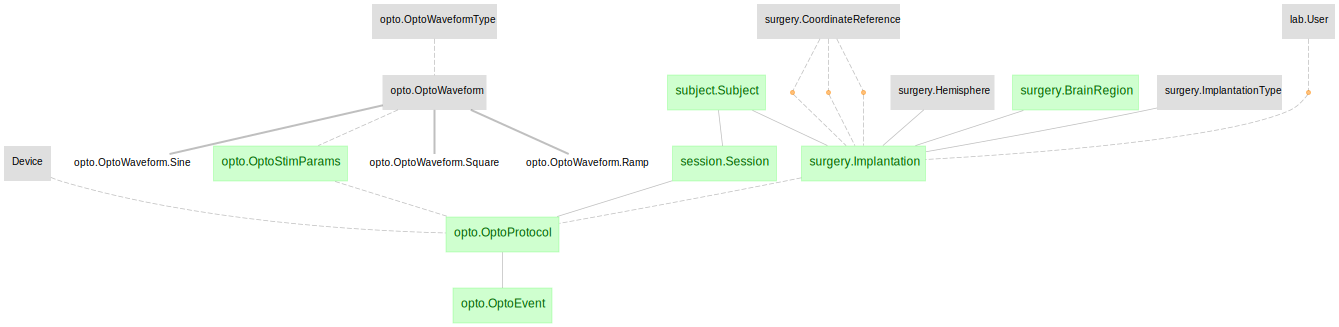

In [6]:
# Plot diagram of tables in multiple schemas.
# Adding and subtracting looks downstream and upstream respectively
dj.Diagram(surgery) + dj.Diagram(opto) - 1

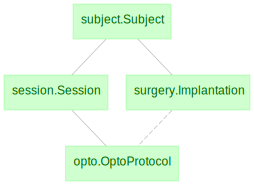

In [10]:
# Plot diagram of selected tables and schemas
(
    dj.Diagram(subject.Subject)
    + dj.Diagram(session.Session)
    + dj.Diagram(surgery.Implantation)
    + dj.Diagram(opto.OptoProtocol)
)

`describe()`: show table definition with foreign key references.


In [11]:
opto.OptoProtocol.describe()

-> session.Session
protocol_id          : int                          
---
-> opto.OptoStimParams
-> surgery.Implantation
-> [nullable] Device



'-> session.Session\nprotocol_id          : int                          \n---\n-> opto.OptoStimParams\n-> surgery.Implantation\n-> [nullable] Device\n'

`heading`: show attribute definitions regardless of foreign key references


In [12]:
opto.OptoProtocol.heading

# 
subject              : varchar(8)                   # 
session_id           : int                          # 
protocol_id          : int                          # 
---
opto_params_id       : smallint                     # 
implant_date         : datetime                     # surgery date
implant_type         : varchar(16)                  # Short name for type of implanted device
region_acronym       : varchar(32)                  # Brain region shorthand
hemisphere           : varchar(8)                   # Brain region hemisphere
device=null          : varchar(32)                  # 

## Elements in `workflow-optogenetics`

[`lab`](https://datajoint.com/docs/elements/element-animal/): lab management related information, such as Lab, User, Project, Protocol, Source.


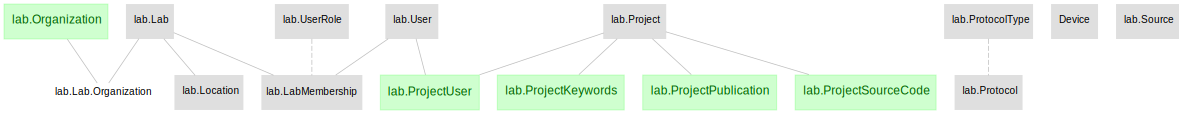

In [13]:
dj.Diagram(lab)

[`subject`](https://datajoint.com/docs/elements/element-animal/): general animal metadata and surgery information

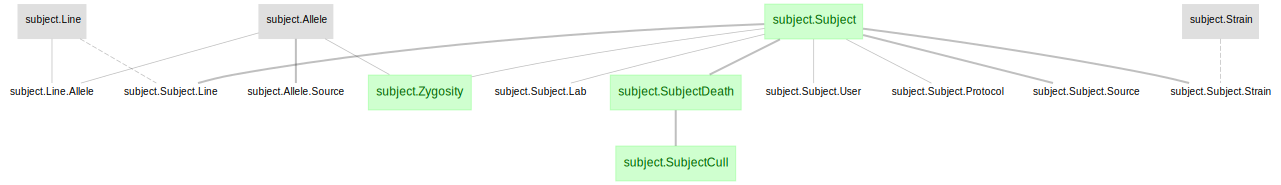

In [14]:
dj.Diagram(subject)

In [16]:
subject.Subject.describe()

subject              : varchar(8)                   
---
subject_nickname=""  : varchar(64)                  
sex                  : enum('M','F','U')            
subject_birth_date   : date                         
subject_description="" : varchar(1024)                



'subject              : varchar(8)                   \n---\nsubject_nickname=""  : varchar(64)                  \nsex                  : enum(\'M\',\'F\',\'U\')            \nsubject_birth_date   : date                         \nsubject_description="" : varchar(1024)                \n'

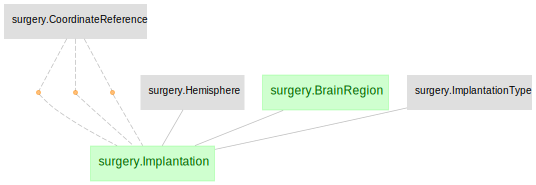

In [15]:
dj.Diagram(surgery)

[`session`](https://datajoint.com/docs/elements/element-session/): General information of experimental sessions.


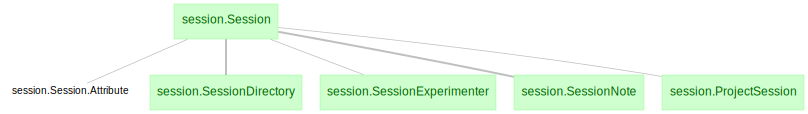

In [17]:
dj.Diagram(session)

In [18]:
session.Session.describe()

-> subject.Subject
session_id           : int                          
---
session_datetime     : datetime                     



'-> subject.Subject\nsession_id           : int                          \n---\nsession_datetime     : datetime                     \n'

[`opto`](https://github.com/datajoint/element-optogenetics): Optogenetics stimulus and timing data


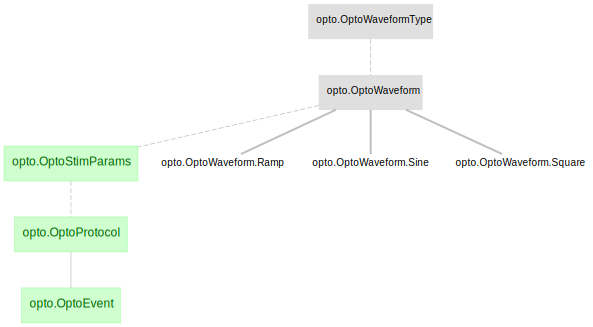

In [19]:
dj.Diagram(opto)

## Summary and next step

- This notebook introduced the overall structures of the schemas and tables in the workflow and relevant tools to explore the schema structure and table definitions.

- In the next notebook [03-process](03-process.ipynb), we will introduce the detailed steps to run through `workflow-optogenetics`.
